In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


all_images_path = 'lfw2Data/lfw2'
training_ds_path =  'lfw2Data/pairsDevTrain.txt'
test_ds_path =  'lfw2Data/pairsDevTest.txt'
main_directory_content = [os.sep.join([all_images_path, x]) for x in list(filter(lambda x: not str(x).lower().find('ds_store')!=-1, os.listdir(all_images_path)))]

In [33]:
# get info on image files distributions
def plot_distribution_num_of_images():
    def get_num_of_images_for_person() -> dict:
        names_to_num_of_images = {}
        for person_dir in main_directory_content:
            names_to_num_of_images[person_dir] = len(os.listdir(person_dir))
        return names_to_num_of_images
    fig, ax = plt.subplots()
    names_to_num_of_images_dict = get_num_of_images_for_person()
    num_of_images = np.array(list(names_to_num_of_images_dict.values()))
    # min max normalization
    # norm_num_of_images = (num_of_images - num_of_images.min())/(num_of_images.max() - num_of_images.min())
    ax.hist(num_of_images)
    # ax.set_xticks(range(0, 1000, 100))
    print('Total number of image files {}\nTotal number of people {}'.format(sum(names_to_num_of_images_dict.values()), len(names_to_num_of_images_dict.keys())))
    ax.set_title("Distribution of peoples' amount of image files")
    return names_to_num_of_images_dict

Total number of image files 13233
Total number of people 5749
Person with most image files: George_W_Bush, with 530 image files


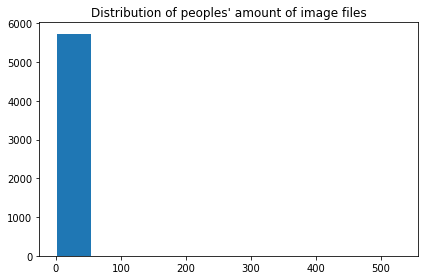

In [34]:
images_num_dict = plot_distribution_num_of_images()
plt.tight_layout()
plt.show()
min_num_of_im, max_num_of_im = min(images_num_dict.values()), max(images_num_dict.values())
max_n = 0
max_key = ''
for key, val in images_num_dict.items():
    if val > max_n:
        max_key = key
        max_n = val
print("Person with most image files: {}, with {} image files".format(max_key.split(os.sep)[-1], max_n))

In [35]:
# get info on database distribution
def plot_distribution_of_appearances(with_match: bool = False):
    def get_num_of_appearances(on_train: bool = True):
        num_of_appearances, matching_appearances, non_matching_appearances = {}, {}, {}
        path_to_inspect = training_ds_path if on_train else test_ds_path
        with open(path_to_inspect, 'r') as file_to_inspect:
            # skip first line
            line = file_to_inspect.readline()
            line = file_to_inspect.readline()
            while line != '' and line is not None:
                spl_line = line.split('\t')
                # matching pair
                if len(spl_line) == 3:
                    name = spl_line[0]
                    matching_appearances[name] = matching_appearances.get(name, 0) + 1
                elif len(spl_line) == 4:
                    name = spl_line[0]
                    non_matching_appearances[name] = non_matching_appearances.get(name, 0) + 1
                    num_of_appearances[name] = num_of_appearances.get(name, 0) + 1
                    name = spl_line[2]
                    non_matching_appearances[name] = non_matching_appearances.get(name, 0) + 1
                line = file_to_inspect.readline()
                num_of_appearances[name] = num_of_appearances.get(name, 0) + 1
        return num_of_appearances, matching_appearances, non_matching_appearances

    fig, ax = plt.subplots(2)
    train_dict, train_matching_appearances, train_non_matching_appearances = get_num_of_appearances()
    dict_vals = list(train_dict.values())
    ax[0].hist(dict_vals)
    ax[0].set_title('training_ds appearance distribution')
    test_dict, test_matching_appearances, test_non_matching_appearances = get_num_of_appearances(on_train=False)
    dict_vals = list(test_dict.values())
    ax[1].hist(dict_vals)
    ax[1].set_title('test_ds appearance distribution')
    if not with_match:
        return train_dict, test_dict
    return train_dict, test_dict, \
           train_matching_appearances,\
           train_non_matching_appearances,\
           test_matching_appearances,\
           test_non_matching_appearances

Person appearing the most in train:Alec_Baldwin with 6 images
Person appearing the most in test:Tang_Jiaxuan with 6 images


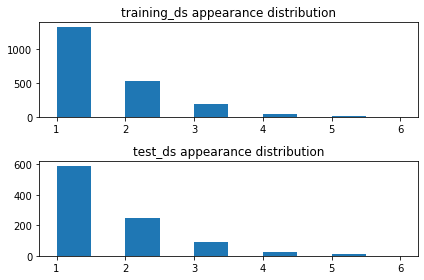

In [36]:
train_appearance_dict, test_appearance_dict = plot_distribution_of_appearances()

train_max_n = 0
train_max_key = ''
for key, val in train_appearance_dict.items():
    if val > train_max_n:
        train_max_key = key
        train_max_n = val
print("Person appearing the most in train:{} with {} images".format(train_max_key, train_max_n))
test_max_n = 0
test_max_key = ''
for key, val in test_appearance_dict.items():
    if val > test_max_n:
        test_max_key = key
        test_max_n = val

print("Person appearing the most in test:{} with {} images".format(test_max_key, test_max_n))
plt.tight_layout()
plt.show()

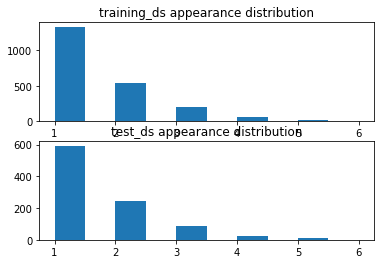

In [16]:
# matching vs Non matching ratio for each person
train_dict, test_dict, train_matching_appearances, train_non_matching_appearances, test_matching_appearances, test_non_matching_appearances = plot_distribution_of_appearances(with_match=True)

# todo:
# calc which appear in matching but not in non matching and vice versa

In [19]:
print('#########TRAINING#########')
set_of_combined_names = set()
set_of_combined_names.update(list(train_matching_appearances.keys()))
set_of_combined_names.update(list(train_non_matching_appearances.keys()))
print('Number of unique people in - \nmatching: {}\nnon-matching: {}\nset of combined: {}\nbag of combined: {}'.format(len(train_matching_appearances.keys()), len(train_non_matching_appearances.keys()), len(set_of_combined_names), (len(train_matching_appearances.keys()) + len(train_non_matching_appearances.keys()))))

print('#########TESTING#########')
set_of_combined_names = set()
set_of_combined_names.update(list(test_matching_appearances.keys()))
set_of_combined_names.update(list(test_non_matching_appearances.keys()))
print('Number of unique people in - \nmatching: {}\nnon-matching: {}\nset of combined: {}\nbag of combined: {}'.format(len(test_matching_appearances.keys()), len(test_non_matching_appearances.keys()), len(set_of_combined_names), (len(test_matching_appearances.keys()) + len(test_non_matching_appearances.keys()))))

#########TRAINING#########
Number of unique people in - 
matching: 788
non-matching: 1695
set of combined: 2132
bag of combined: 2483
#########TESTING#########
Number of unique people in - 
matching: 353
non-matching: 748
set of combined: 963
bag of combined: 1101


Min ratio: 0.0
Max Ratio:3.0
amount of appearing in training matching only 437/788
##################
Min ratio: 0.0
Max Ratio:4.0
amount of appearing in training non matching only 1781/2132


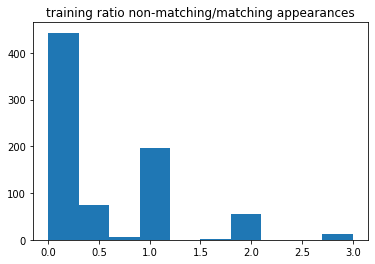

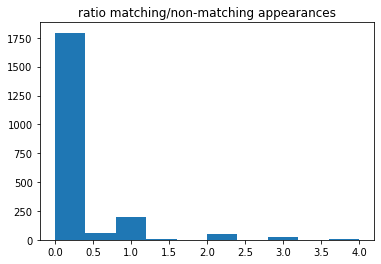

In [37]:
type_inquiry = 'training'
ratios = {}
# Training set investigation
for key, val in train_matching_appearances.items():
    ratios[key] = train_non_matching_appearances.get(key, 0) / val

ratios_np = np.array(list(ratios.values()))
fig, ax = plt.subplots()
ax.hist(ratios_np)
ax.set_title('{} ratio non-matching/matching appearances'.format(type_inquiry))
print("Min ratio: {}\nMax Ratio:{}".format(ratios_np.min(), ratios_np.max()))
print("amount of appearing in {} matching only {}/{}".format(type_inquiry, len(ratios_np[ratios_np==0]), len(ratios_np)))
for key, val in train_non_matching_appearances.items():
    ratios[key] = train_matching_appearances.get(key, 0) / val
print('##################')
ratios_np = np.array(list(ratios.values()))
fig, ax = plt.subplots()
ax.hist(ratios_np)
ax.set_title('ratio matching/non-matching appearances')
print("Min ratio: {}\nMax Ratio:{}".format(ratios_np.min(), ratios_np.max()))
plt.show()
print("amount of appearing in {} non matching only {}/{}".format(type_inquiry, len(ratios_np[ratios_np==0]), len(ratios_np)))

Min ratio: 0.0
Max Ratio:4.0
amount of appearing in testing matching only 215/353
##################
Min ratio: 0.0
Max Ratio:4.0
amount of appearing in testing non matching only 825/963


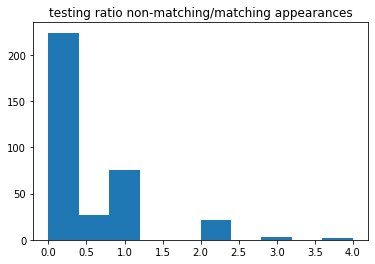

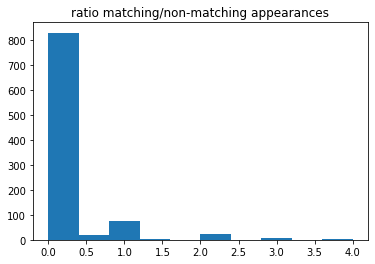

In [39]:
#########TESTING#########
type_inquiry = 'testing'
ratios = {}
# Training set investigation
for key, val in test_matching_appearances.items():
    ratios[key] = test_non_matching_appearances.get(key, 0) / val

ratios_np = np.array(list(ratios.values()))
fig, ax = plt.subplots()
ax.hist(ratios_np)
ax.set_title('{} ratio non-matching/matching appearances'.format(type_inquiry))
print("Min ratio: {}\nMax Ratio:{}".format(ratios_np.min(), ratios_np.max()))
print("amount of appearing in {} matching only {}/{}".format(type_inquiry, len(ratios_np[ratios_np==0]), len(ratios_np)))
for key, val in test_non_matching_appearances.items():
    ratios[key] = test_matching_appearances.get(key, 0) / val
print('##################')
ratios_np = np.array(list(ratios.values()))
fig, ax = plt.subplots()
ax.hist(ratios_np)
ax.set_title('ratio matching/non-matching appearances')
print("Min ratio: {}\nMax Ratio:{}".format(ratios_np.min(), ratios_np.max()))
plt.show()
print("amount of appearing in {} non matching only {}/{}".format(type_inquiry, len(ratios_np[ratios_np==0]), len(ratios_np)))

TODO:

In [49]:
def get_pairs_in_dataset(on_train: bool = True):
    matching_names = []
    non_matching_pairs = []
    all_names = set()
    path_to_inspect = training_ds_path if on_train else test_ds_path
    with open(path_to_inspect, 'r') as file_to_inspect:
        # skip first line
        line = file_to_inspect.readline()
        line = file_to_inspect.readline()
        while line != '' and line is not None:
            spl_line = line.split('\t')
            # matching pair
            if len(spl_line) == 3:
                matching_names.append(spl_line[0])
                all_names.update([spl_line[0]])
            # non matching pair
            elif len(spl_line) == 4:
                non_matching_pairs.append((spl_line[0], spl_line[2]))
                all_names.update([spl_line[0], spl_line[2]])

            line = file_to_inspect.readline()

    return matching_names, non_matching_pairs, all_names

def cust_comp(x: tuple, y: tuple):
    return (x[0]==y[0] and x[1]==y[1]) or (x[1]==y[0] and y[1]==x[0])

def find_equal_pairs(train_pairs, test_pairs):
    ctr = 0
    for i in range(len(train_pairs)):
        for j in range(len(test_pairs)):
            ctr += 1 if cust_comp(train_pairs[i], test_pairs[j]) else 0
    return ctr

In [50]:
train_matching_names, train_non_matching_pairs, train_all_names = get_pairs_in_dataset(True)
test_matching_names, test_non_matching_pairs, test_all_names = get_pairs_in_dataset(False)

In [54]:
# are there really no shared pairs between training and testing?
ctr = find_equal_pairs(train_non_matching_pairs, test_non_matching_pairs)
print('#Pairs in both train and test:\n {}/{}'.format(ctr, max(len(train_all_names), len(test_all_names))))

#Pairs in both train and test:
 0/2132


In [53]:
# names appearing in both train and test
ctr = 0
train_all_names_lst = list(train_all_names)
test_all_names_lst = list(test_all_names)
for i in range(len(train_all_names)):
        for j in range(len(test_all_names)):
            ctr += 1 if train_all_names_lst[i] == test_all_names_lst[j] else 0
print('#Names in both train and test:\n {}/{}'.format(ctr, max(len(train_all_names), len(test_all_names))))

#names appearing in both train and test:
 0/2132
